### **Kmeans and SVM:**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [15]:
# Load extracted features and labels
X = np.load('../feature extraction/image_features.npy')
y = np.load('../feature extraction/image_labels.npy')


In [16]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

if we use k-means and svm using sklearn, we get a better accuracy, hence using it here:

In [5]:
# Range of K (clusters) to evaluate
k_values = list(range(10, 101, 5))  # From 10 to 100 in steps of 5
train_accuracies = []
test_accuracies = []

best_k = None
best_test_acc = 0
best_train_acc = 0

for k in k_values:
    print(f"Evaluating for K = {k}")
    
    # Step 1: KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Step 2: Add cluster IDs as features
    X_clustered = np.hstack([X_scaled, cluster_labels.reshape(-1, 1)])

    # Step 3: Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_clustered, y, test_size=0.2, random_state=42, stratify=y)

    # Step 4: Train SVM
    svm = SVC(kernel='rbf', C=10, gamma='scale')
    svm.fit(X_train, y_train)

    # Step 5: Evaluate
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)

    if acc_test > best_test_acc:
        best_test_acc = acc_test
        best_train_acc = acc_train
        best_k = k


Evaluating for K = 10
Evaluating for K = 15
Evaluating for K = 20
Evaluating for K = 25
Evaluating for K = 30
Evaluating for K = 35
Evaluating for K = 40
Evaluating for K = 45
Evaluating for K = 50
Evaluating for K = 55
Evaluating for K = 60
Evaluating for K = 65
Evaluating for K = 70
Evaluating for K = 75
Evaluating for K = 80
Evaluating for K = 85
Evaluating for K = 90
Evaluating for K = 95
Evaluating for K = 100


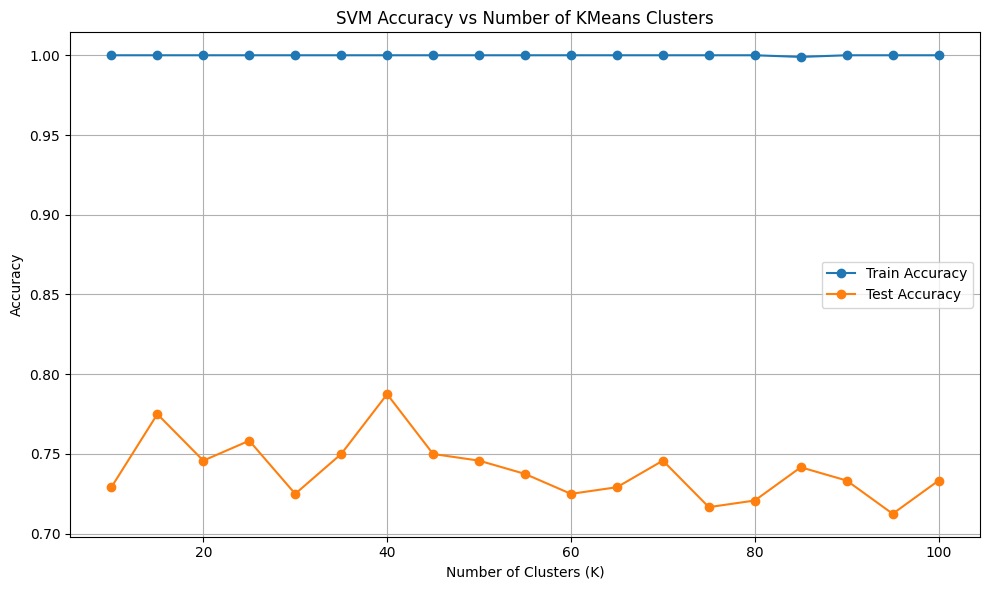

In [6]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('SVM Accuracy vs Number of KMeans Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# Final output
print(f"\n Best K: {best_k}")
print(f" Best Test Accuracy: {best_test_acc:.4f}")
print(f" Corresponding Train Accuracy: {best_train_acc:.4f}")


 Best K: 40
 Best Test Accuracy: 0.7875
 Corresponding Train Accuracy: 1.0000


---

The implementation from scratch:

In [12]:
# KMeans From Scratch
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:  # Handle empty cluster
            centroids.append(X[np.random.randint(0, X.shape[0])])
        else:
            centroids.append(np.mean(cluster_points, axis=0))
    return np.vstack(centroids)

def kmeans_scratch(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

In [21]:
k_values = list(range(10, 101, 5)) # From 10 to 100 in steps of 5
train_accs = []
test_accs = []
best_k = None
best_test = 0

for k in k_values:
    print(f"Running for K = {k}...")
    
    cluster_labels, _ = kmeans_scratch(X_scaled, k)
    
    # Append cluster ID as new feature
    cluster_feat = cluster_labels.reshape(-1, 1)
    X_clustered = np.hstack([X_scaled, cluster_feat])
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_clustered, y, test_size=0.3, random_state=42, stratify=y)
    
    # Train SVM
    clf = SVC(kernel='rbf', C=10, gamma='scale')
    clf.fit(X_train, y_train)

    # Accuracy
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    if test_acc > best_test:
        best_test = test_acc
        best_k = k
        best_train = train_acc

Running for K = 10...
Running for K = 15...
Running for K = 20...
Running for K = 25...
Running for K = 30...
Running for K = 35...
Running for K = 40...
Running for K = 45...
Running for K = 50...
Running for K = 55...
Running for K = 60...
Running for K = 65...
Running for K = 70...
Running for K = 75...
Running for K = 80...
Running for K = 85...
Running for K = 90...
Running for K = 95...
Running for K = 100...


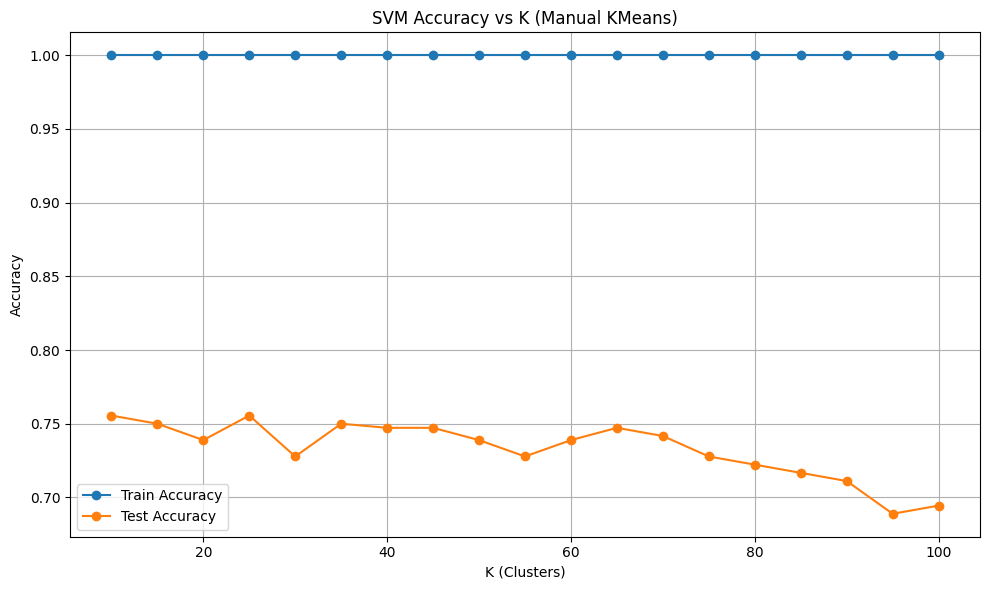


 Best K: 10
 Best Test Accuracy: 0.7556
 Train Accuracy at Best K: 1.0000


In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accs, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accs, label='Test Accuracy', marker='o')
plt.title('SVM Accuracy vs K (Manual KMeans)')
plt.xlabel('K (Clusters)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n Best K: {best_k}")
print(f" Best Test Accuracy: {best_test:.4f}")
print(f" Train Accuracy at Best K: {best_train:.4f}")